# Imports, dataframes, parameters

In [67]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

# Functions

In [68]:
os.listdir('..')
os.makedirs('../pictures', exist_ok=True)

In [69]:
def plot_color(df, param, ax, metric):
    df = df.rename({f'{param}': f'color: {param}'}, 
                    axis=1)
    color_min = min(df[f'color: {param}'])
    color_max = max(df[f'color: {param}'])

    log_norm_color = colors.LogNorm(vmin=color_min, vmax=color_max)
    
    sns.scatterplot(
        data=df,
        x='max_allocated_memory',
        y=metric,
        hue=f'color: {param}',
        hue_norm=log_norm_color,
        palette='coolwarm',
        sizes=(20, 200),
        alpha=0.8,
        ax=ax,
    )

    ax.set_xlabel('Memory, GB')
    ax.set_ylabel(metric)

In [70]:
def plot_all_plots(df, title_name, metric='NDCG_10_test'):
    max_metric = max(df[metric])
    min_metric = min(df[metric])
    h = max_metric - min_metric
    ylim = [min_metric-h/20, max_metric+2/3*h]

    column_names = ['loss_sample_count', 'batch_size', 'max_seq_len']
    fig, ax = plt.subplots(len(column_names), len(column_names), figsize=(25,18))
    plt.suptitle(title_name, fontsize=16)
    for i in range(len(column_names)):
        for j in range(len(column_names)):
            if(i!=j):
                unique_values = np.sort(df[column_names[j]].unique())
                grouped_df = df.groupby([column_names[i], column_names[j]])[metric].max().reset_index() 
                for value in unique_values:
                    subset = grouped_df[grouped_df[column_names[j]] == value]
                    ax[i,j].plot(subset[column_names[i]], subset[metric], label=f'{column_names[j]}={value}', alpha=0.5)
                    ax[i,j].scatter(df[column_names[i]][df[column_names[j]]==value], df[metric][df[column_names[j]]==value], s=2*df['max_allocated_memory'][df[column_names[j]]==value], alpha=0.6)
                ax[i,j].set_xlabel(column_names[i])
                ax[i,j].set_ylabel(metric)
                ax[i,j].set_xscale('log', base=2)
                ax[i,j].set_ylim(ylim)
                ax[i,j].legend()
    plt.show()

# loading data

In [71]:
exp_path = "../experiments.csv"

all_experiments = pd.read_csv(exp_path)

df_all_exp.reset_index(drop=True)

megamarket_sasrec_cce.csv 12
30music_sasrec_cem.csv 232
zvuk_sasrec_ce.csv 12
zvuk_sasrec_lr.csv 77
beauty_sasrec_ce.csv 7
movielens20m_sasrec_ce.csv 34
movielens20m_sasrec_cem.csv 228
megamarket_sasrec_lr.csv 52
megamarket_sasrec_cem.csv 234
gowalla_sasrec_cem.csv 275
zvuk_sasrec_cem.csv 216
beauty_sasrec_cem.csv 319


,Unnamed: 0,train_loss_epoch_val,train_loss_step_val,run_training_epoch,run_training_batch,allocated_memory,max_allocated_memory,Coverage_1_test,Coverage_10_test,Coverage_100_test,...,Surprisal_5_test,dataset,model,batch_size,loss_sample_count,max_seq_len,seed,exp_name,learning_rate,Unnamed: 0.1
0,0.0,4.173 3.554 3.521 3.504 3.495,13.499 11.588 8.87 5.656 5.014 4.954 4.937 4.8...,1767.50,0.323720,0.000003,8.083170,0.024133,0.055859,0.098452,...,0.483103,megamarket,sasrec,64,NaN,256,42.0,megamarket_sasrec_cce,NaN,NaN
1,1.0,5.536 4.852 4.806 4.79 4.777,13.562 12.16 10.365 6.944 7.695 6.98 7.286 7.4...,998.89,0.172770,0.000003,7.951136,0.021895,0.049476,0.086003,...,0.478134,megamarket,sasrec,64,NaN,128,42.0,megamarket_sasrec_cce,NaN,NaN
2,2.0,6.977 6.214 6.166 6.152 6.14 6.13,13.669 12.456 11.339 9.996 9.966 8.986 9.063 8...,617.31,0.097708,0.000003,7.885164,0.019827,0.043592,0.077029,...,0.480669,megamarket,sasrec,64,NaN,64,42.0,megamarket_sasrec_cce,NaN,NaN
3,3.0,8.352 7.566 7.494 7.463 7.443,13.942 12.865 12.001 9.687 10.31 10.425 9.931 ...,420.85,0.059188,0.000003,7.852190,0.015842,0.031944,0.055946,...,0.470644,megamarket,sasrec,64,NaN,32,42.0,megamarket_sasrec_cce,NaN,NaN
4,0.0,4.223 3.859 3.835 3.83 3.831,13.701 11.607 9.214 5.843 4.613 5.317 5.983 5....,1946.20,0.167050,0.000003,7.951685,0.021655,0.048449,0.084800,...,0.500275,megamarket,sasrec,32,NaN,256,42.0,megamarket_sasrec_cce,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,NaN,10.841 10.233 9.904 9.576 9.238 8.936 8.686 8....,11.314 11.154 11.473 11.233 10.982 11.048 10.9...,312.03,0.248110,0.105064,13.073637,0.025178,0.085493,0.230729,...,0.460394,beauty,sasrec,512,256.0,1024,42.0,beauty_sasrec_cem,NaN,135.0
1694,NaN,10.919 10.421 10.128 9.874 9.595 9.325 9.09 8....,11.326 11.156 11.415 11.252 10.993 11.053 10.9...,322.24,0.256460,0.105064,17.353756,0.038666,0.114844,0.263846,...,0.486397,beauty,sasrec,512,512.0,1024,42.0,beauty_sasrec_cem,NaN,136.0
1695,NaN,10.939 10.495 10.233 10.03 9.798 9.557 9.338 9...,11.3 11.164 11.453 11.241 11.0 11.061 10.947 1...,347.57,0.277220,0.105064,25.912527,0.038980,0.106327,0.236920,...,0.494647,beauty,sasrec,512,1024.0,1024,42.0,beauty_sasrec_cem,NaN,137.0
1696,NaN,10.874 10.351 10.091 9.866 9.639 9.438 9.273 9...,11.301 11.171 11.45 11.227 10.984 11.041 10.93...,374.85,0.299550,0.105064,34.242802,0.041890,0.108767,0.234124,...,0.491162,beauty,sasrec,512,1512.0,1024,42.0,beauty_sasrec_cem,NaN,138.0


In [72]:
all_experiments

['megamarket_sasrec_cce.csv',
 '30music_sasrec_cem.csv',
 'zvuk_sasrec_ce.csv',
 'zvuk_sasrec_lr.csv',
 'beauty_sasrec_ce.csv',
 'movielens20m_sasrec_ce.csv',
 'movielens20m_sasrec_cem.csv',
 'megamarket_sasrec_lr.csv',
 'megamarket_sasrec_cem.csv',
 'gowalla_sasrec_cem.csv',
 'zvuk_sasrec_cem.csv',
 'beauty_sasrec_cem.csv']

In [73]:
title_name = "SASRec gowalla"
print('Experiments run:', len(df_all_exp))

Experiments run: 1698


# Plots

In [74]:
rename_dict = {
    'batch_size': 'bs',
    'loss_sample_count': 'ns',
    'max_seq_len': 'sl',
    'NDCG_10_test': 'NDCG@10',
    'Surprisal_10_test': 'Surprisal@10',
    'Coverage_10_test': 'Coverage@10'
}

In [75]:
mask = (~df_all_exp['exp_name'].str.contains('cce')) & \
    (~df_all_exp['exp_name'].str.contains('lr'))

df_save = df_all_exp[mask].reset_index(drop=True)
df_save.to_excel('../pictures/data.xlsx')

In [76]:
df_all_exp['exp_name'].unique()

array(['megamarket_sasrec_cce', '30music_sasrec_cem', 'zvuk_sasrec_ce',
       'zvuk_sasrec_lr', 'beauty_sasrec_ce', 'movielens20m_sasrec_ce',
       'movielens20m_sasrec_cem', 'megamarket_sasrec_lr',
       'megamarket_sasrec_cem', 'gowalla_sasrec_cem', 'zvuk_sasrec_cem',
       'beauty_sasrec_cem'], dtype=object)

## plot scatter memory

In [77]:
def plot_memory(
    df,
    title_name,
    metric='NDCG_10_test',
    color_feature='batch_size',
    size_feature='max_seq_len',
    shape_feature='loss_sample_count',
    rename_features=None,
    ax=None,
    legend=True,
    xlabel=True,
    ylabel=True,
):

    if rename_features:
        df = df.copy().rename(columns=rename_features)
    sns.set_style('ticks')

    color_min = min(df[color_feature])
    color_max = max(df[color_feature])
    size_min = min(df[size_feature])
    size_max = max(df[size_feature])

    log_norm_color = colors.LogNorm(vmin=color_min, vmax=color_max)
    log_norm_size = colors.LogNorm(vmin=size_min, vmax=size_max)

    polygon_markers = ['^', 's', 'p', 'h', 'H', '8', (4,1,0), (8,1,0), (12,1,0)]

    unique_counts = sorted(df[shape_feature].unique())
    marker_dict = {count: polygon_markers[i % len(polygon_markers)] for i, count in enumerate(unique_counts)}

    rename_feature_dict={feature: f'{name}: {feature}' for name, feature \
                         in zip(['color', 'size', 'shape'], [color_feature, size_feature, shape_feature])}
    
    df = df.rename(columns=rename_feature_dict)

    if not ax:
        plt.figure(figsize=(6, 6), dpi=300)
        sns.scatterplot(
            data=df,
            x='max_allocated_memory',
            y=metric,
            hue=rename_feature_dict[color_feature],
            hue_norm=log_norm_color,
            palette='coolwarm',
            size=rename_feature_dict[size_feature],
            sizes=(20, 200),
            size_norm=log_norm_size,
            style=rename_feature_dict[shape_feature],
            markers=marker_dict,
            alpha=0.8,
        )

        plt.title(title_name)
        if xlabel:
            plt.xlabel('Memory, GB')
        if ylabel:
            plt.ylabel(metric)
        if legend:
            plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0.)
        plt.show()
    else:
        sns.scatterplot(
            data=df,
            x='max_allocated_memory',
            y=metric,
            hue=rename_feature_dict[color_feature],
            hue_norm=log_norm_color,
            palette='coolwarm',
            size=rename_feature_dict[size_feature],
            sizes=(20, 200),
            size_norm=log_norm_size,
            style=rename_feature_dict[shape_feature],
            markers=marker_dict,
            alpha=0.8,
            ax=ax
        )
        ax.set_title(title_name)
        if xlabel:
            ax.set_xlabel('Memory, GB')
        else:
            ax.set_xlabel('')   
        if ylabel:
            ax.set_ylabel(metric)
        else:
            ax.set_ylabel('')   

        if legend:
            ax.legend(bbox_to_anchor=(3.85, 0.85), loc='upper right', borderaxespad=0.)
        else:
            ax.get_legend().set_visible(False)

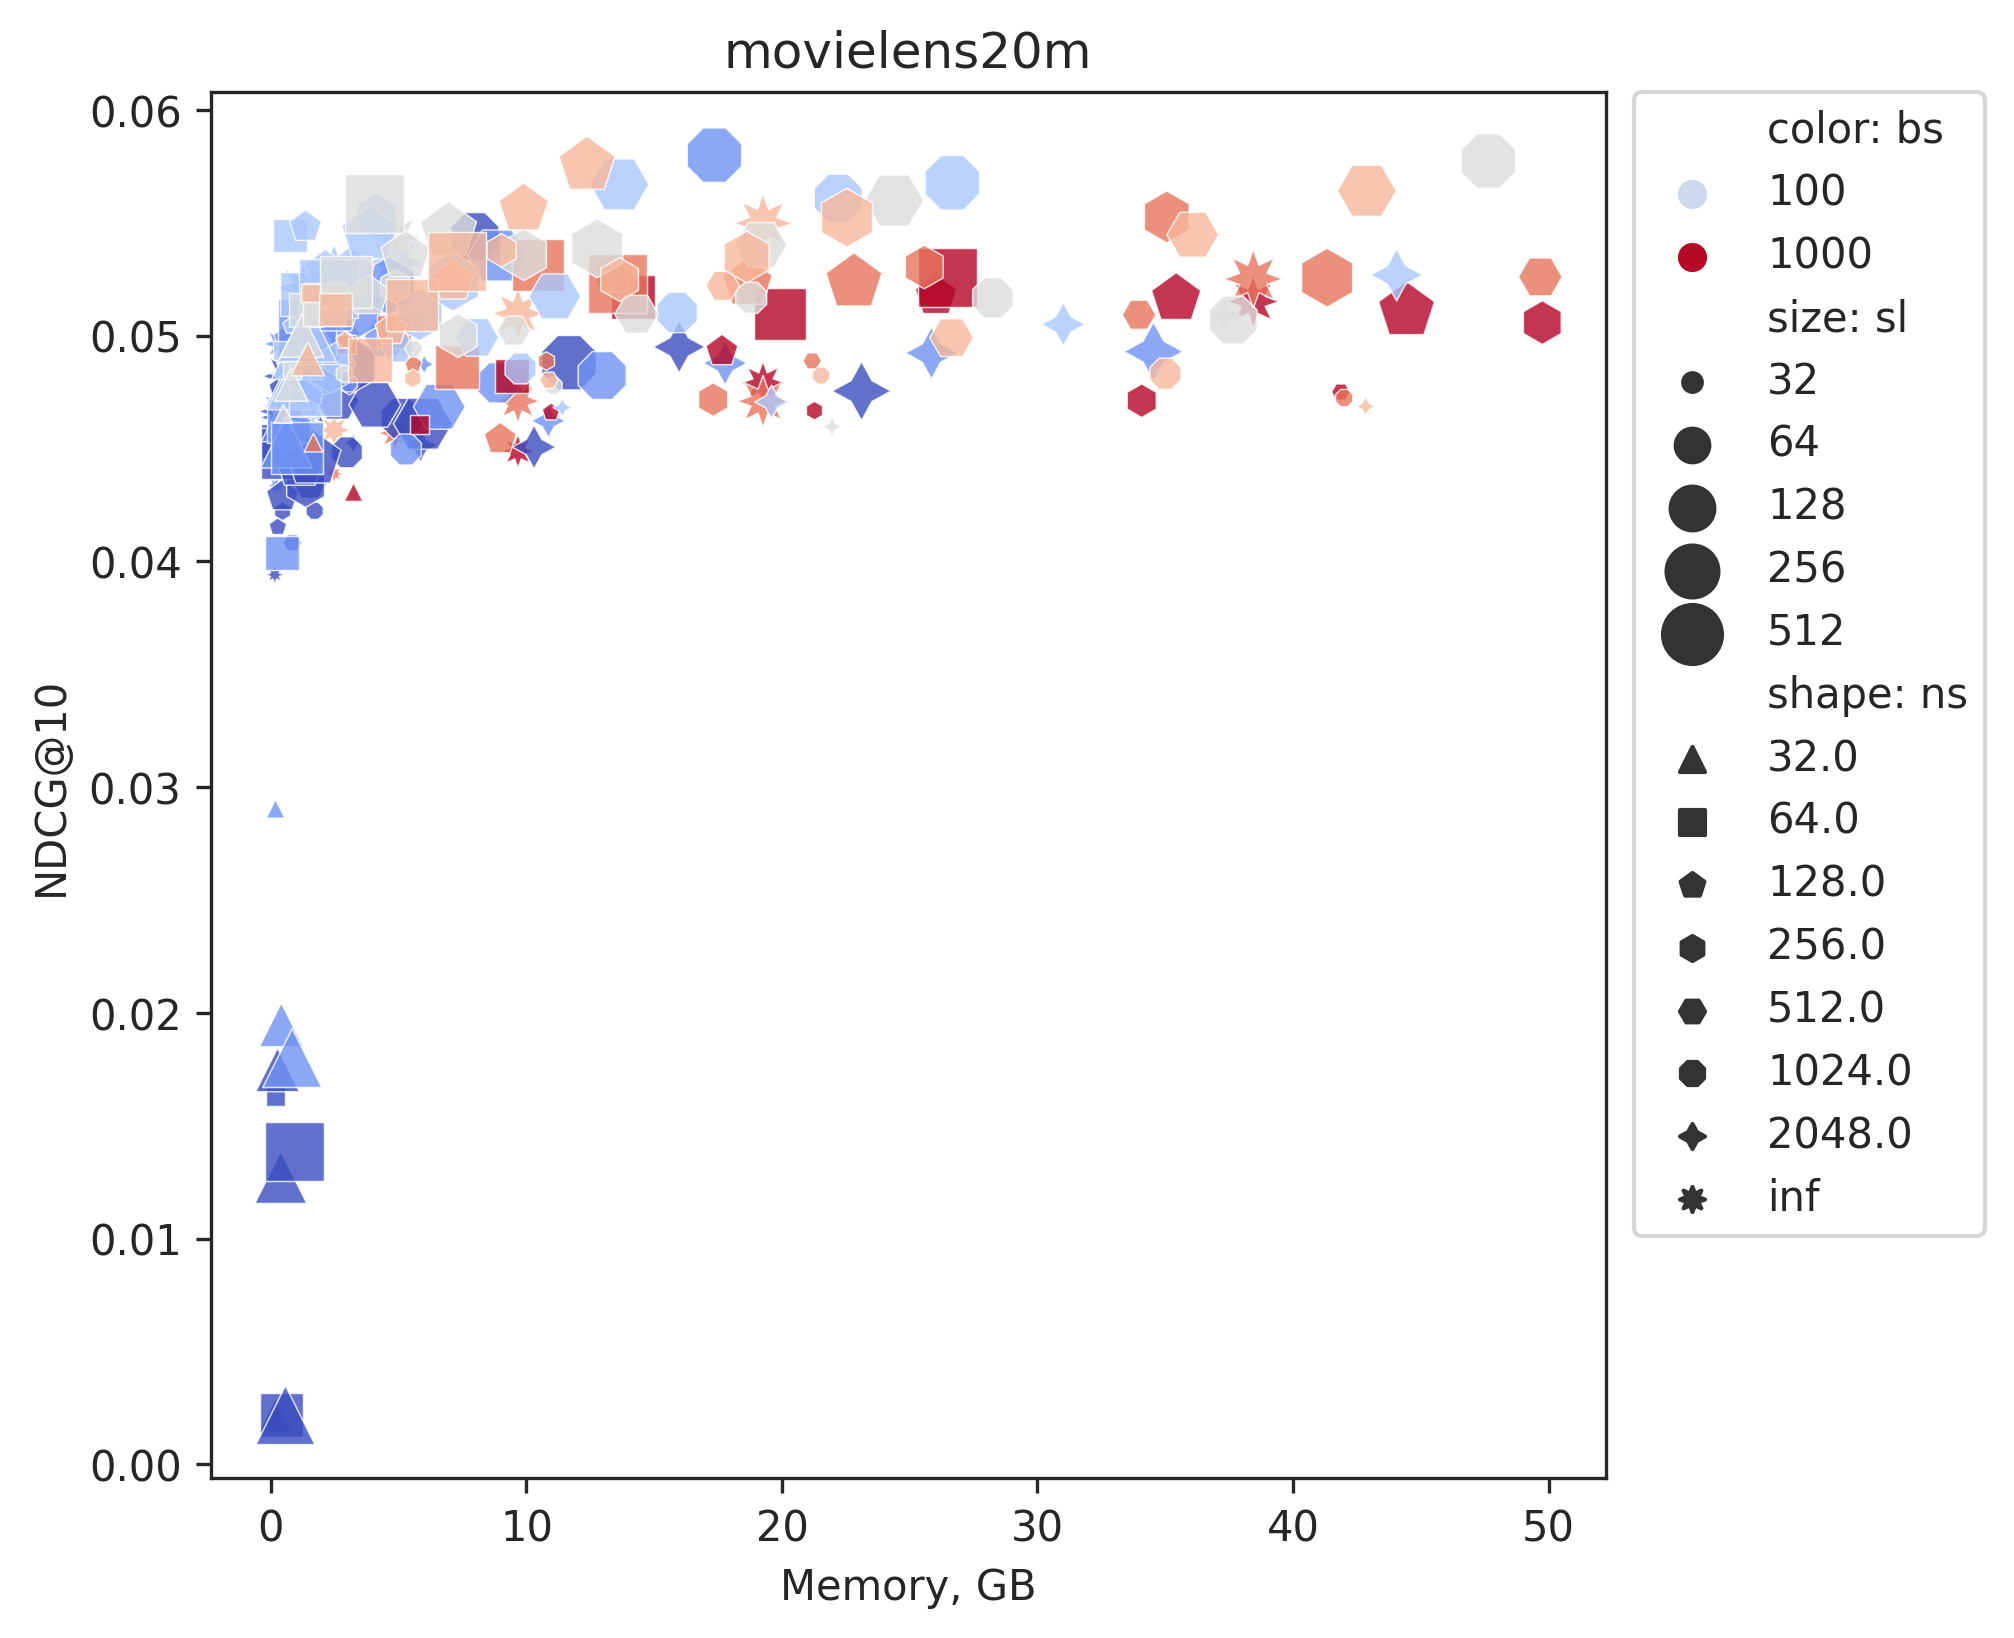

In [78]:
ds_name = 'movielens20m'
filter_ = True

params_filter = {
    'zvuk': {'method': 'filter', 'boxes':[(50, 0.05, 1.0)]},
    'megamarket': {'method': 'filter', 'boxes':[(53, 0.002, 0.0075), (51, 0.0075, 1)]},
    '30music': {'method': 'filter', 'boxes':[(40, 0, 0.065), (55, 0.065, 1)]},
    'beauty': {'method': 'filter', 'boxes':[(25, 0.00, 0.01)]},
    'gowalla': {'method': 'filter', 'boxes':[(49, 0.0, 1.0)]},
    'movielens20m': {'method': 'filter', 'boxes':[(50.2, 0.0, 0.052)]},
}


mask = (df_all_exp['exp_name'].str.contains(ds_name)) & \
        (~df_all_exp['exp_name'].str.contains('cce')) & \
        (~df_all_exp['exp_name'].str.contains('lr'))  & \
        (df_all_exp['loss_sample_count'].astype(str).str.slice(0, 2) != '15')

if filter_ and params_filter[ds_name]['method'] == 'filter':
    for box in params_filter[ds_name]['boxes']:
        mask = mask & (((df_all_exp['max_allocated_memory'] < box[0]) | (df_all_exp['NDCG_10_test'] > box[2])) & \
                       ((df_all_exp['max_allocated_memory'] < box[0]) | (df_all_exp['NDCG_10_test'] < box[1])))

df = df_all_exp[mask].reset_index(drop=True)
df['loss_sample_count'] = df['loss_sample_count'].round().fillna(np.inf)

plot_memory(
    df=df, 
    title_name=ds_name,
    rename_features=rename_dict, 
    metric='NDCG@10',
    color_feature='bs',
    size_feature='sl',
    shape_feature='ns',
)

In [79]:
df['batch_size'].unique(), df['loss_sample_count'].unique(), df['max_seq_len'].unique()

(array([  16,   32, 1024,  512,   64,  128,  256]),
 array([  inf,   32.,   64.,  128.,  256.,  512., 1024., 2048.]),
 array([ 32,  64, 128, 256, 512]))

/tmp/ipykernel_1186268/3080729731.py:54: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


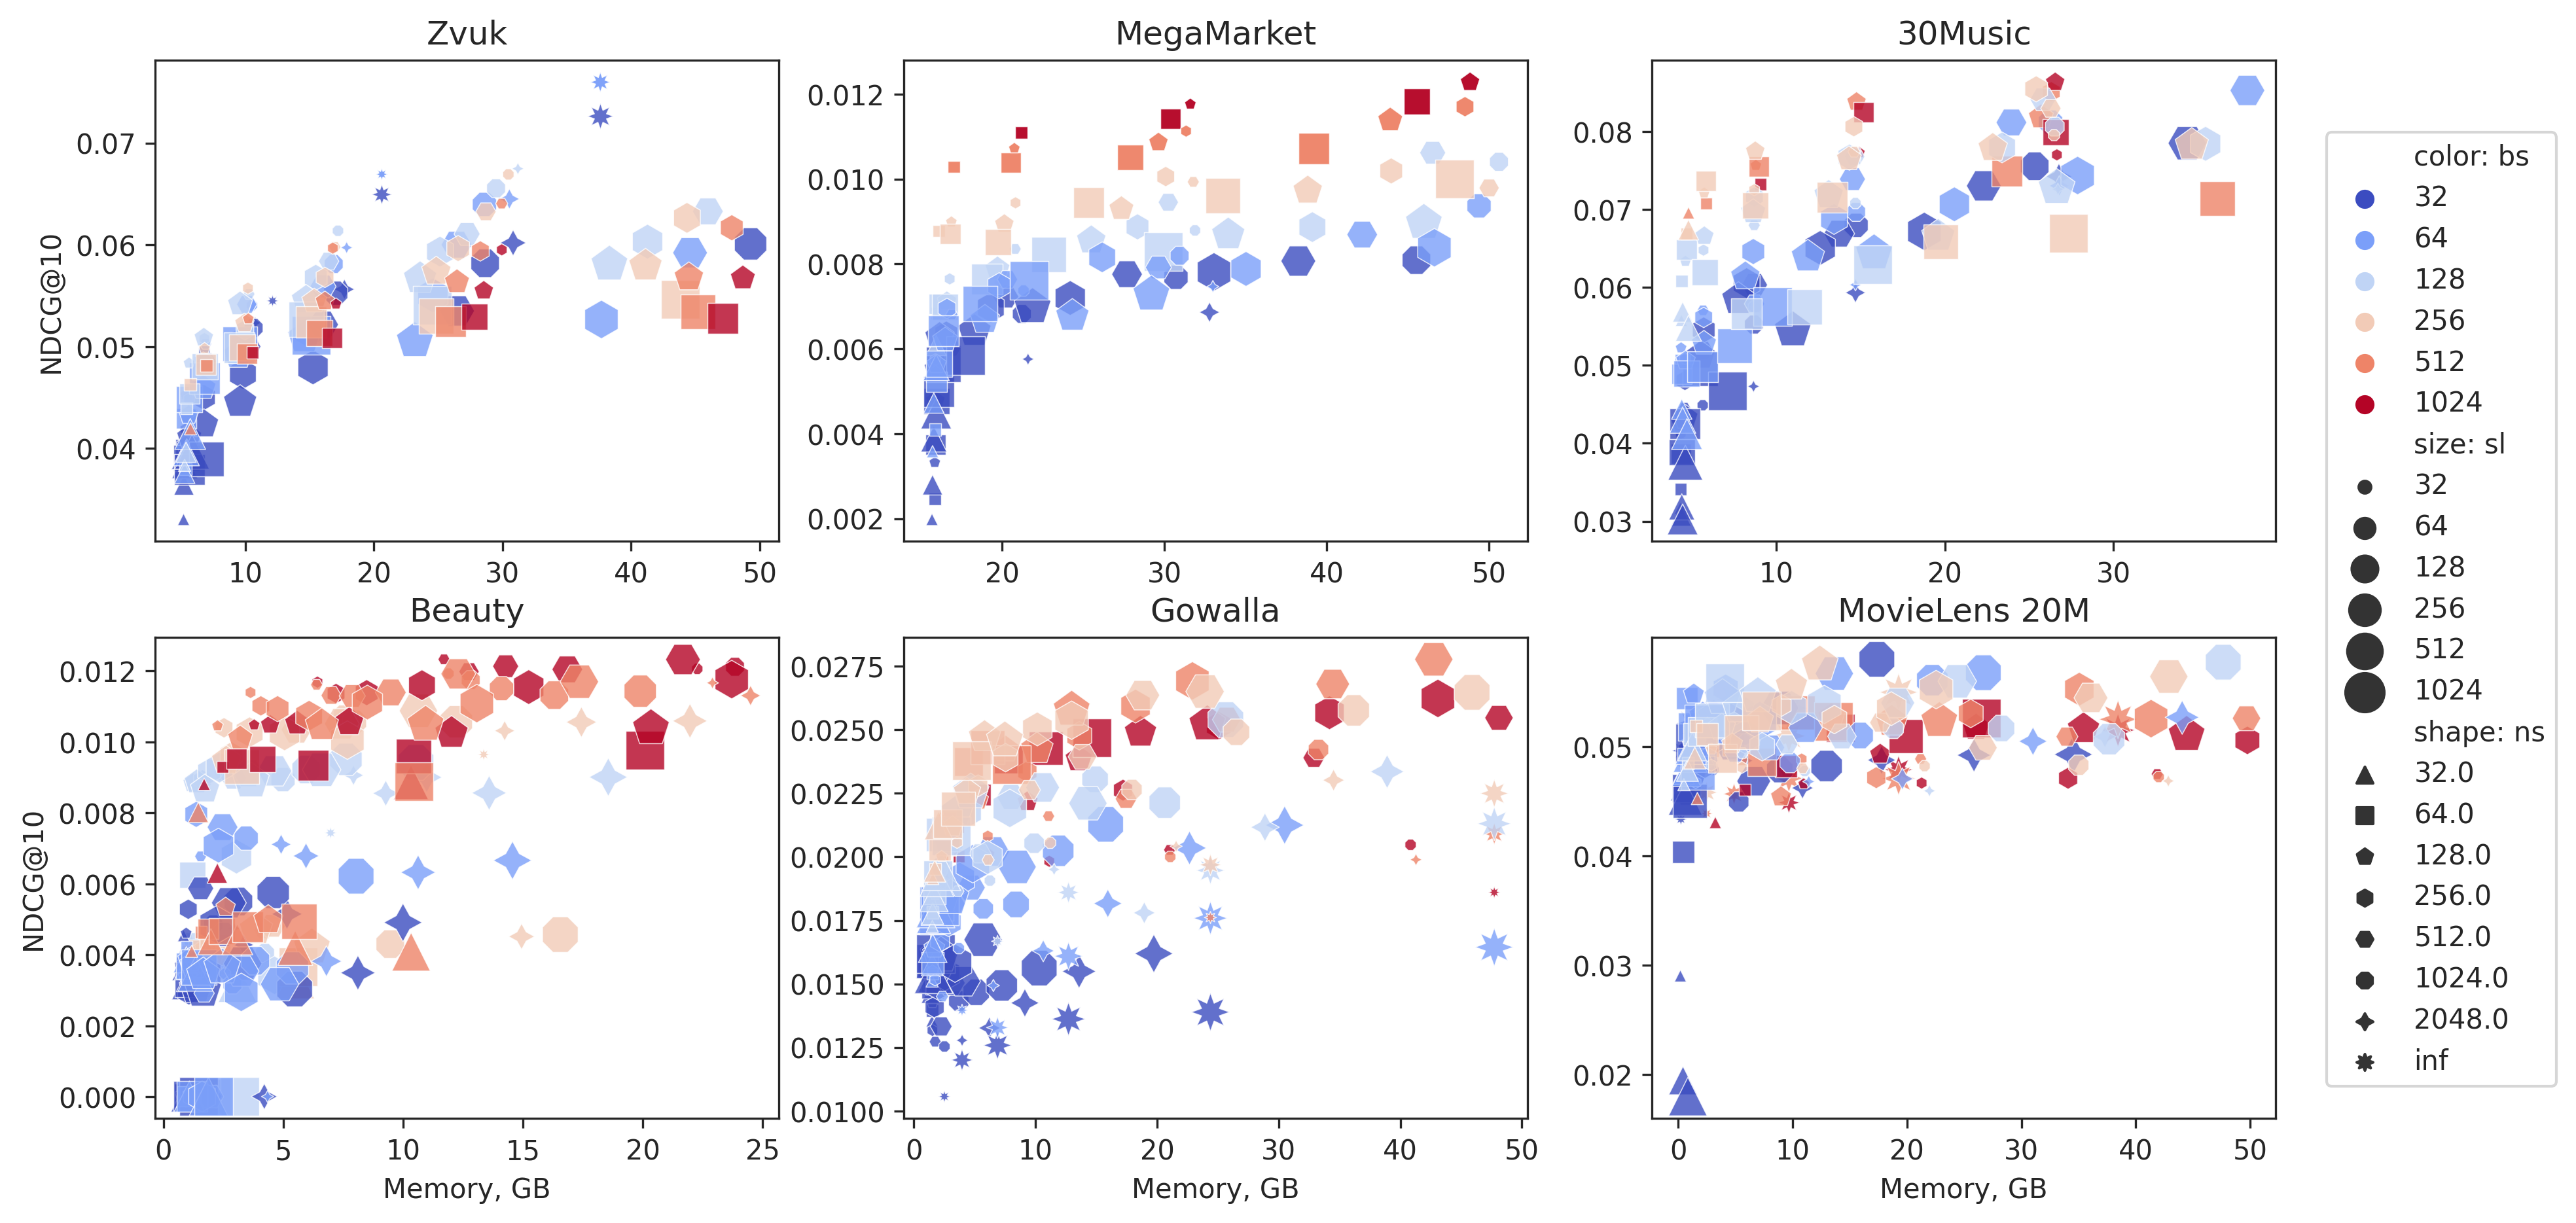

In [80]:
datasets = ['Zvuk', 'MegaMarket', '30Music', 'Beauty', 'Gowalla', 'MovieLens 20M']
ds_short_names = ['zvuk', 'megamarket', '30music', 'beauty', 'gowalla', 'movielens20m']

filter_ = True

params_filter = {
    'zvuk': {'method': 'filter', 'boxes':[(50, 0.05, 1.0)]},
    'megamarket': {'method': 'filter', 'boxes':[(53, 0.002, 0.0075), (51, 0.0075, 1)]},
    '30music': {'method': 'filter', 'boxes':[(40, 0, 0.065), (55, 0.065, 1)]},
    'beauty': {'method': 'filter', 'boxes':[(25, 0.00, 0.01)]},
    'gowalla': {'method': 'filter', 'boxes':[(49, 0.0, 1.0)]},
    'movielens20m': {'method': 'filter', 'boxes':[(50.2, 0.0, 0.052)]},
}


ds_to_full_name = dict(zip(ds_short_names, datasets))

fig, axes = plt.subplots(2, 3, figsize=(16, 7), dpi=300)

for i, ds_name in enumerate(ds_short_names):
    ax = axes[i // 3, i % 3]

    mask = (df_all_exp['exp_name'].str.contains(ds_name)) & \
            (~df_all_exp['exp_name'].str.contains('cce')) & \
            (~df_all_exp['exp_name'].str.contains('lr'))  & \
            (df_all_exp['loss_sample_count'].astype(str).str.slice(0, 2) != '15')  & \
            (df_all_exp['batch_size'] > 30)


    if filter_ and params_filter[ds_name]['method'] == 'filter':
        for box in params_filter[ds_name]['boxes']:
            mask = mask & (((df_all_exp['max_allocated_memory'] < box[0]) | (df_all_exp['NDCG_10_test'] > box[2])) & \
                        ((df_all_exp['max_allocated_memory'] < box[0]) | (df_all_exp['NDCG_10_test'] < box[1])))

    df = df_all_exp[mask].reset_index(drop=True)
    df['loss_sample_count'] = df['loss_sample_count'].round().fillna(np.inf) 
    if len(df) == 0:
        print(ds_name)
        continue
    legend = plot_memory(
        df=df, 
        title_name=ds_to_full_name[ds_name],
        rename_features=rename_dict, 
        metric='NDCG@10',
        color_feature='bs',
        size_feature='sl',
        shape_feature='ns',
        ax=ax,
        legend=i==0,
        ylabel=i%3==0,
        xlabel=i>2,
    )

plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.savefig('../pictures/multiplot.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.savefig('../pictures/multiplot.png', dpi=1000, format='png', bbox_inches='tight')
plt.show()

## plot params connection

In [81]:
def plot_connection(
    df,
    title_name,
    metric='NDCG_10_test',
    param_feature='max_seq_len',
    color_feature='batch_size',
    rename_features=None,
    filter=True,
    add_intervals=True,
    ax=None,
    legend=True
):
    if rename_features:
        df = df.copy().rename(columns=rename_features)

    max_metric = max(df[metric])
    min_metric = min(df[metric])
    h = max_metric - min_metric
    ylim = [min_metric - h / 20, max_metric + 2 / 3 * h]

    if filter:
        unique_val = df[color_feature].unique()
        filtered_values = unique_val[np.arange(len(unique_val)) % 2 == 0]
        df = df[df[color_feature].isin(filtered_values)]

    unique_values = np.sort(df[color_feature].unique())
    grouped_df = df.groupby([param_feature, color_feature], as_index=False)[metric].agg(['mean', 'std', 'count'])

    polygon_markers = ['^', 's', 'p', 'h', 'H', '8', (4,1,0), (8,1,0), (12,1,0)]
    noises = np.linspace(-0.03, 0.03, len(unique_values))

    if not ax:
        plt.figure(figsize=(10, 7), dpi=300)
        plt.title(title_name, fontsize=16)
        for i, value in enumerate(unique_values):
            subset_gr = grouped_df[grouped_df[color_feature] == value].copy()
            subset_gr['ci'] = subset_gr['std'] * 1.96 / np.sqrt(subset_gr['count'])
            subset_gr['lower'] = subset_gr['mean'] - subset_gr['ci']
            subset_gr['upper'] = subset_gr['mean'] + subset_gr['ci']

            p = plt.plot(
                subset_gr[param_feature] * (1 + noises[i]), 
                subset_gr['mean'], 
                label=value, 
                alpha=0.8, 
                marker=polygon_markers[i],
            )

            if add_intervals:
                color = p[0].get_color()
                for index, row in subset_gr.iterrows():
                    x = row[param_feature] * (1 + noises[i])
                    bottom, top = row['lower'], row['upper']
                    left, right = x - x*0.05, x + x*0.05
                    plt.plot([x, x], [top, bottom], color=color, alpha=0.3)
                    plt.plot([left, right], [top, top], color=color, alpha=0.3)
                    plt.plot([left, right], [bottom, bottom], color=color, alpha=0.3)

        plt.xlabel(param_feature)
        plt.ylabel(metric)
        plt.xscale('log', base=2)
        if legend:
            plt.legend(title=color_feature)
        plt.show()

    else:
        ax.set_title(title_name)
        for i, value in enumerate(unique_values):
            subset_gr = grouped_df[grouped_df[color_feature] == value].copy()
            subset_gr['ci'] = subset_gr['std'] * 1.96 / np.sqrt(subset_gr['count'])
            subset_gr['lower'] = subset_gr['mean'] - subset_gr['ci']
            subset_gr['upper'] = subset_gr['mean'] + subset_gr['ci']

            p = ax.plot(
                subset_gr[param_feature] * (1 + noises[i]), 
                subset_gr['mean'], 
                label=value, 
                alpha=0.8, 
                marker=polygon_markers[i],
            )

            if add_intervals:
                color = p[0].get_color()
                for index, row in subset_gr.iterrows():
                    x = row[param_feature] * (1 + noises[i])
                    bottom, top = row['lower'], row['upper']
                    left, right = x - x*0.05, x + x*0.05
                    ax.plot([x, x], [top, bottom], color=color, alpha=0.3)
                    ax.plot([left, right], [top, top], color=color, alpha=0.3)
                    ax.plot([left, right], [bottom, bottom], color=color, alpha=0.3)

        ax.set_xlabel(param_feature)
        ax.set_ylabel(metric)
        ax.set_xscale('log', base=2)

        if legend:
            ax.legend(title=color_feature, loc='best')


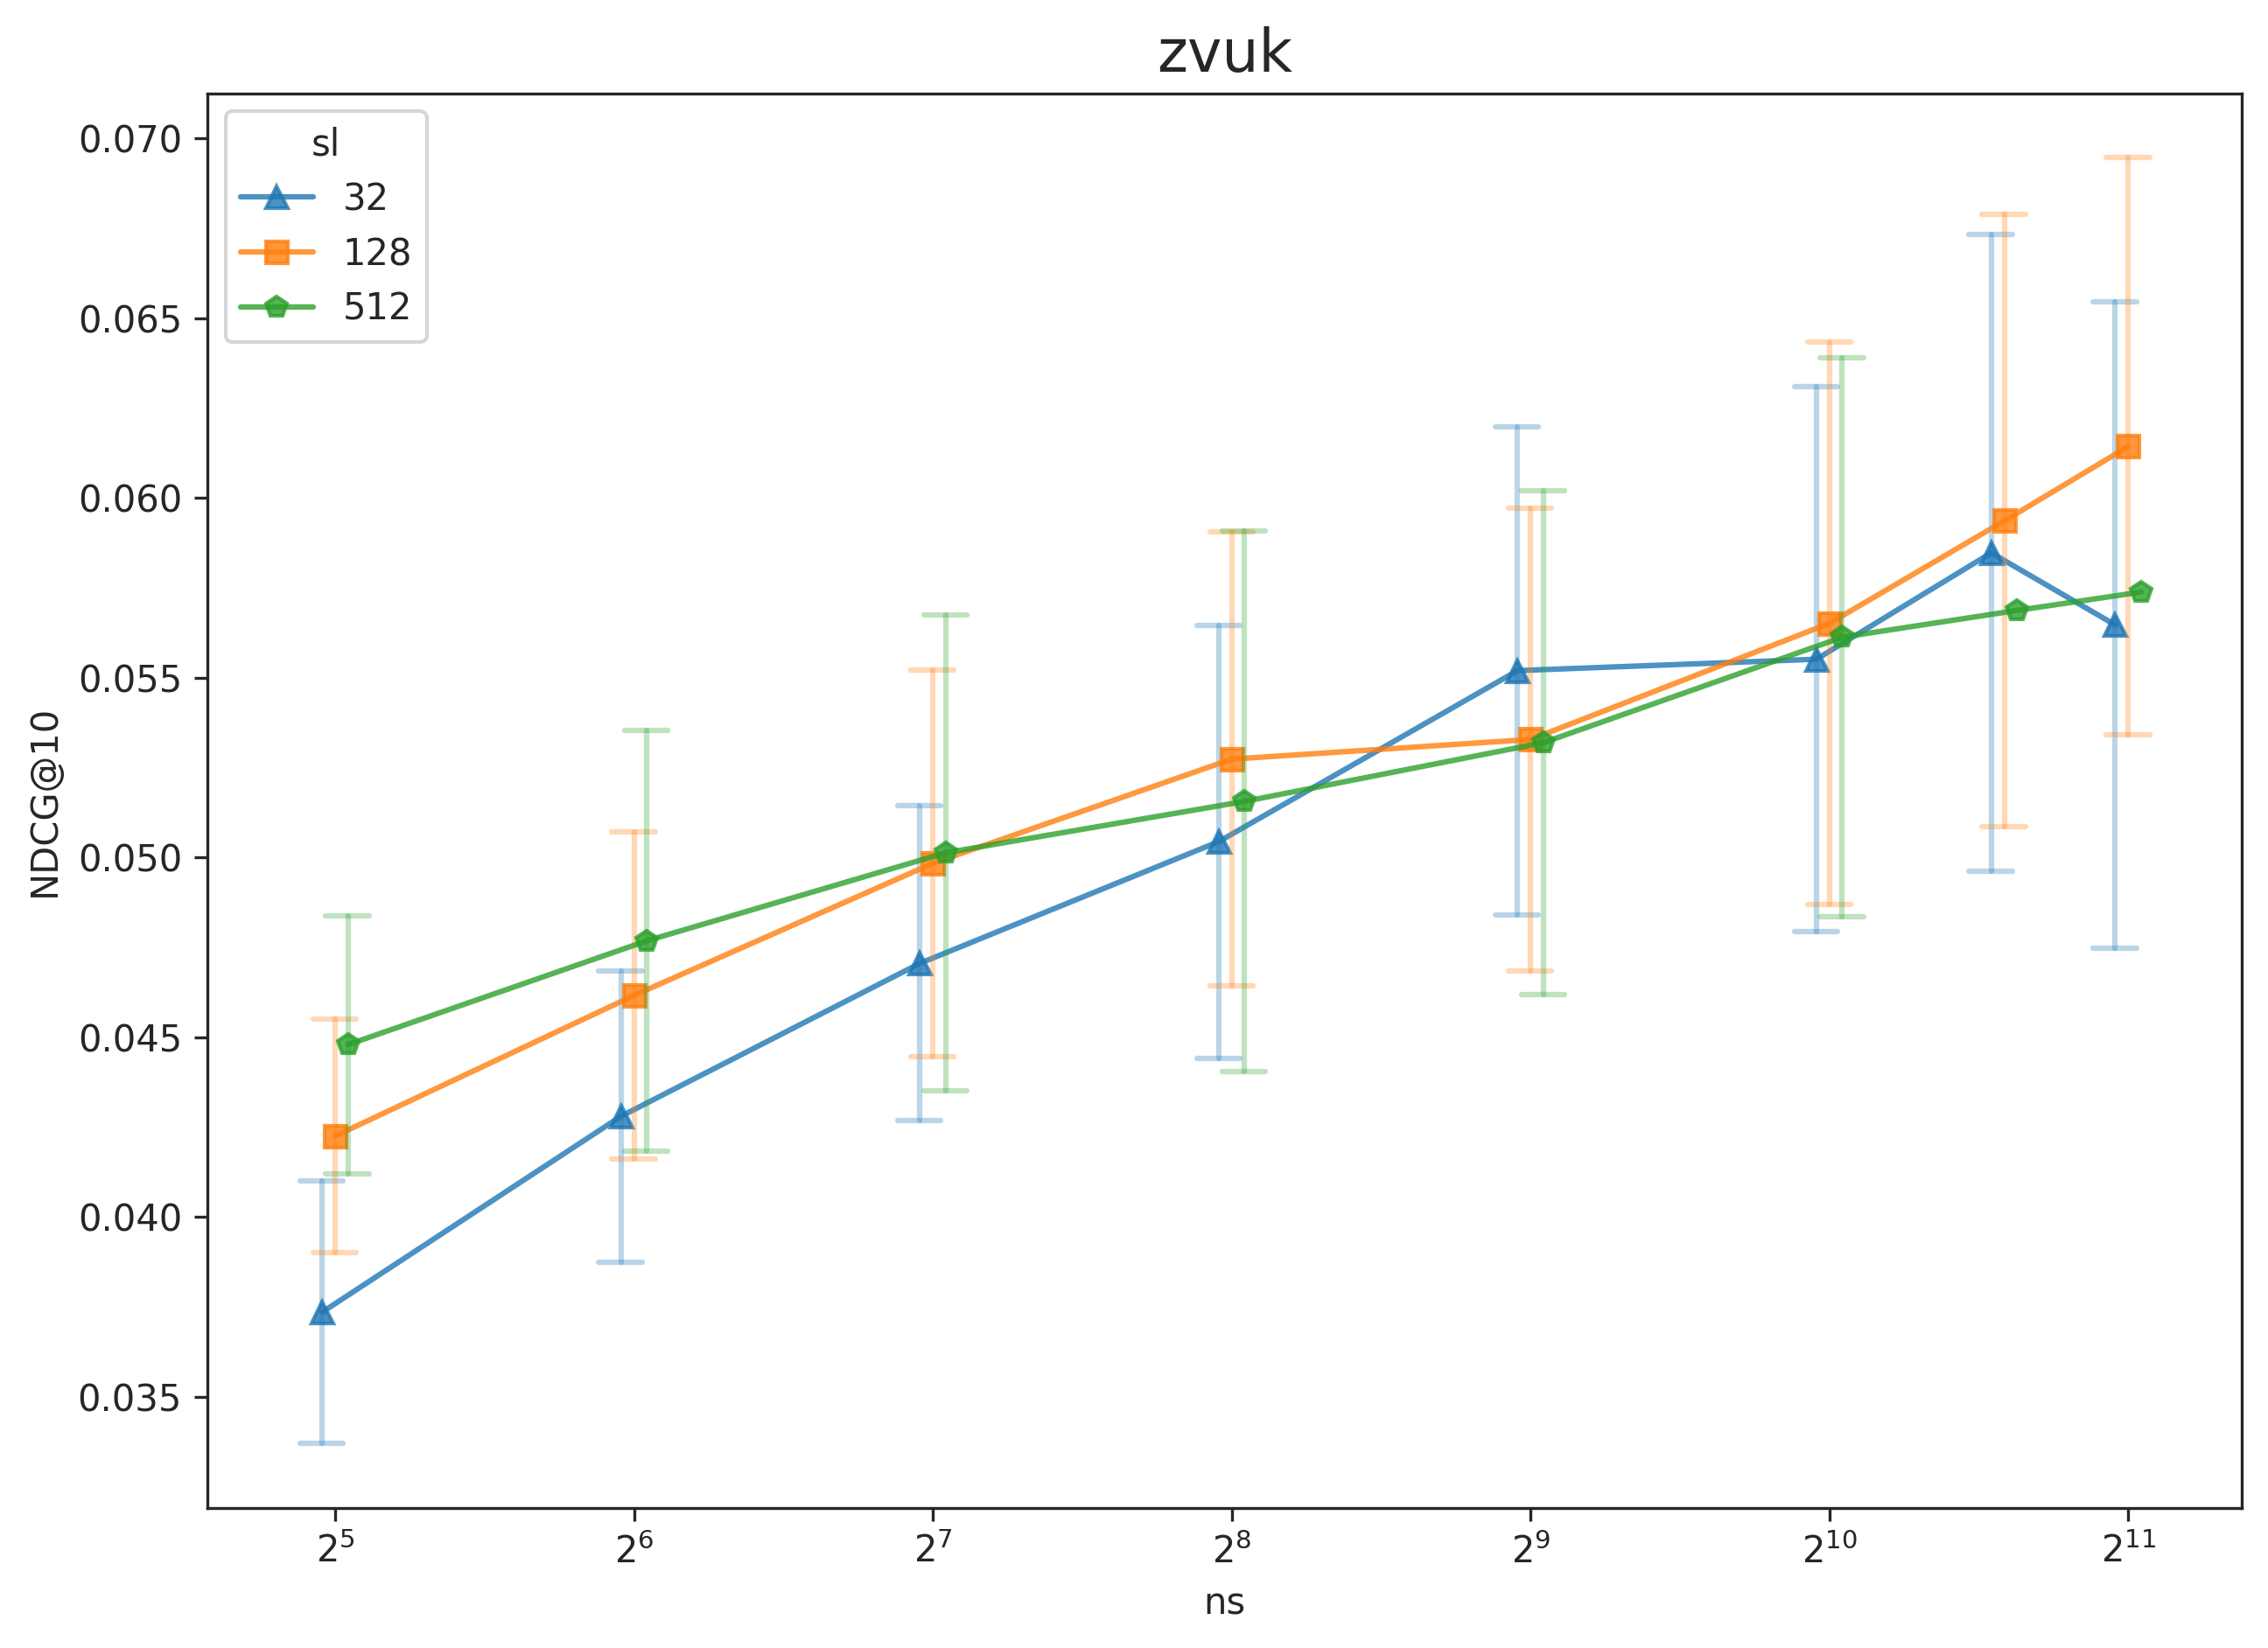

In [82]:
ds_name = 'zvuk'

mask = (df_all_exp['exp_name'].str.contains(ds_name)) & \
    (~df_all_exp['exp_name'].str.contains('cce')) & \
    (~df_all_exp['exp_name'].str.contains('lr')) & \
    (df_all_exp['loss_sample_count'] % 2 == 0) 

df = df_all_exp[mask].reset_index(drop=True)
df['loss_sample_count'] = df['loss_sample_count'].round().fillna(np.inf)

plot_connection(df=df, title_name=ds_name, metric='NDCG@10', color_feature='sl', param_feature='ns', rename_features=rename_dict)

/tmp/ipykernel_1186268/2013055652.py:87: RuntimeWarning: invalid value encountered in scalar subtract
  left, right = x - x*0.05, x + x*0.05
/tmp/ipykernel_1186268/2013055652.py:87: RuntimeWarning: invalid value encountered in scalar subtract
  left, right = x - x*0.05, x + x*0.05
/tmp/ipykernel_1186268/2013055652.py:87: RuntimeWarning: invalid value encountered in scalar subtract
  left, right = x - x*0.05, x + x*0.05
/tmp/ipykernel_1186268/2013055652.py:87: RuntimeWarning: invalid value encountered in scalar subtract
  left, right = x - x*0.05, x + x*0.05
/tmp/ipykernel_1186268/2013055652.py:87: RuntimeWarning: invalid value encountered in scalar subtract
  left, right = x - x*0.05, x + x*0.05
/tmp/ipykernel_1186268/2013055652.py:87: RuntimeWarning: invalid value encountered in scalar subtract
  left, right = x - x*0.05, x + x*0.05
/tmp/ipykernel_1186268/2013055652.py:87: RuntimeWarning: invalid value encountered in scalar subtract
  left, right = x - x*0.05, x + x*0.05
/tmp/ipykerne

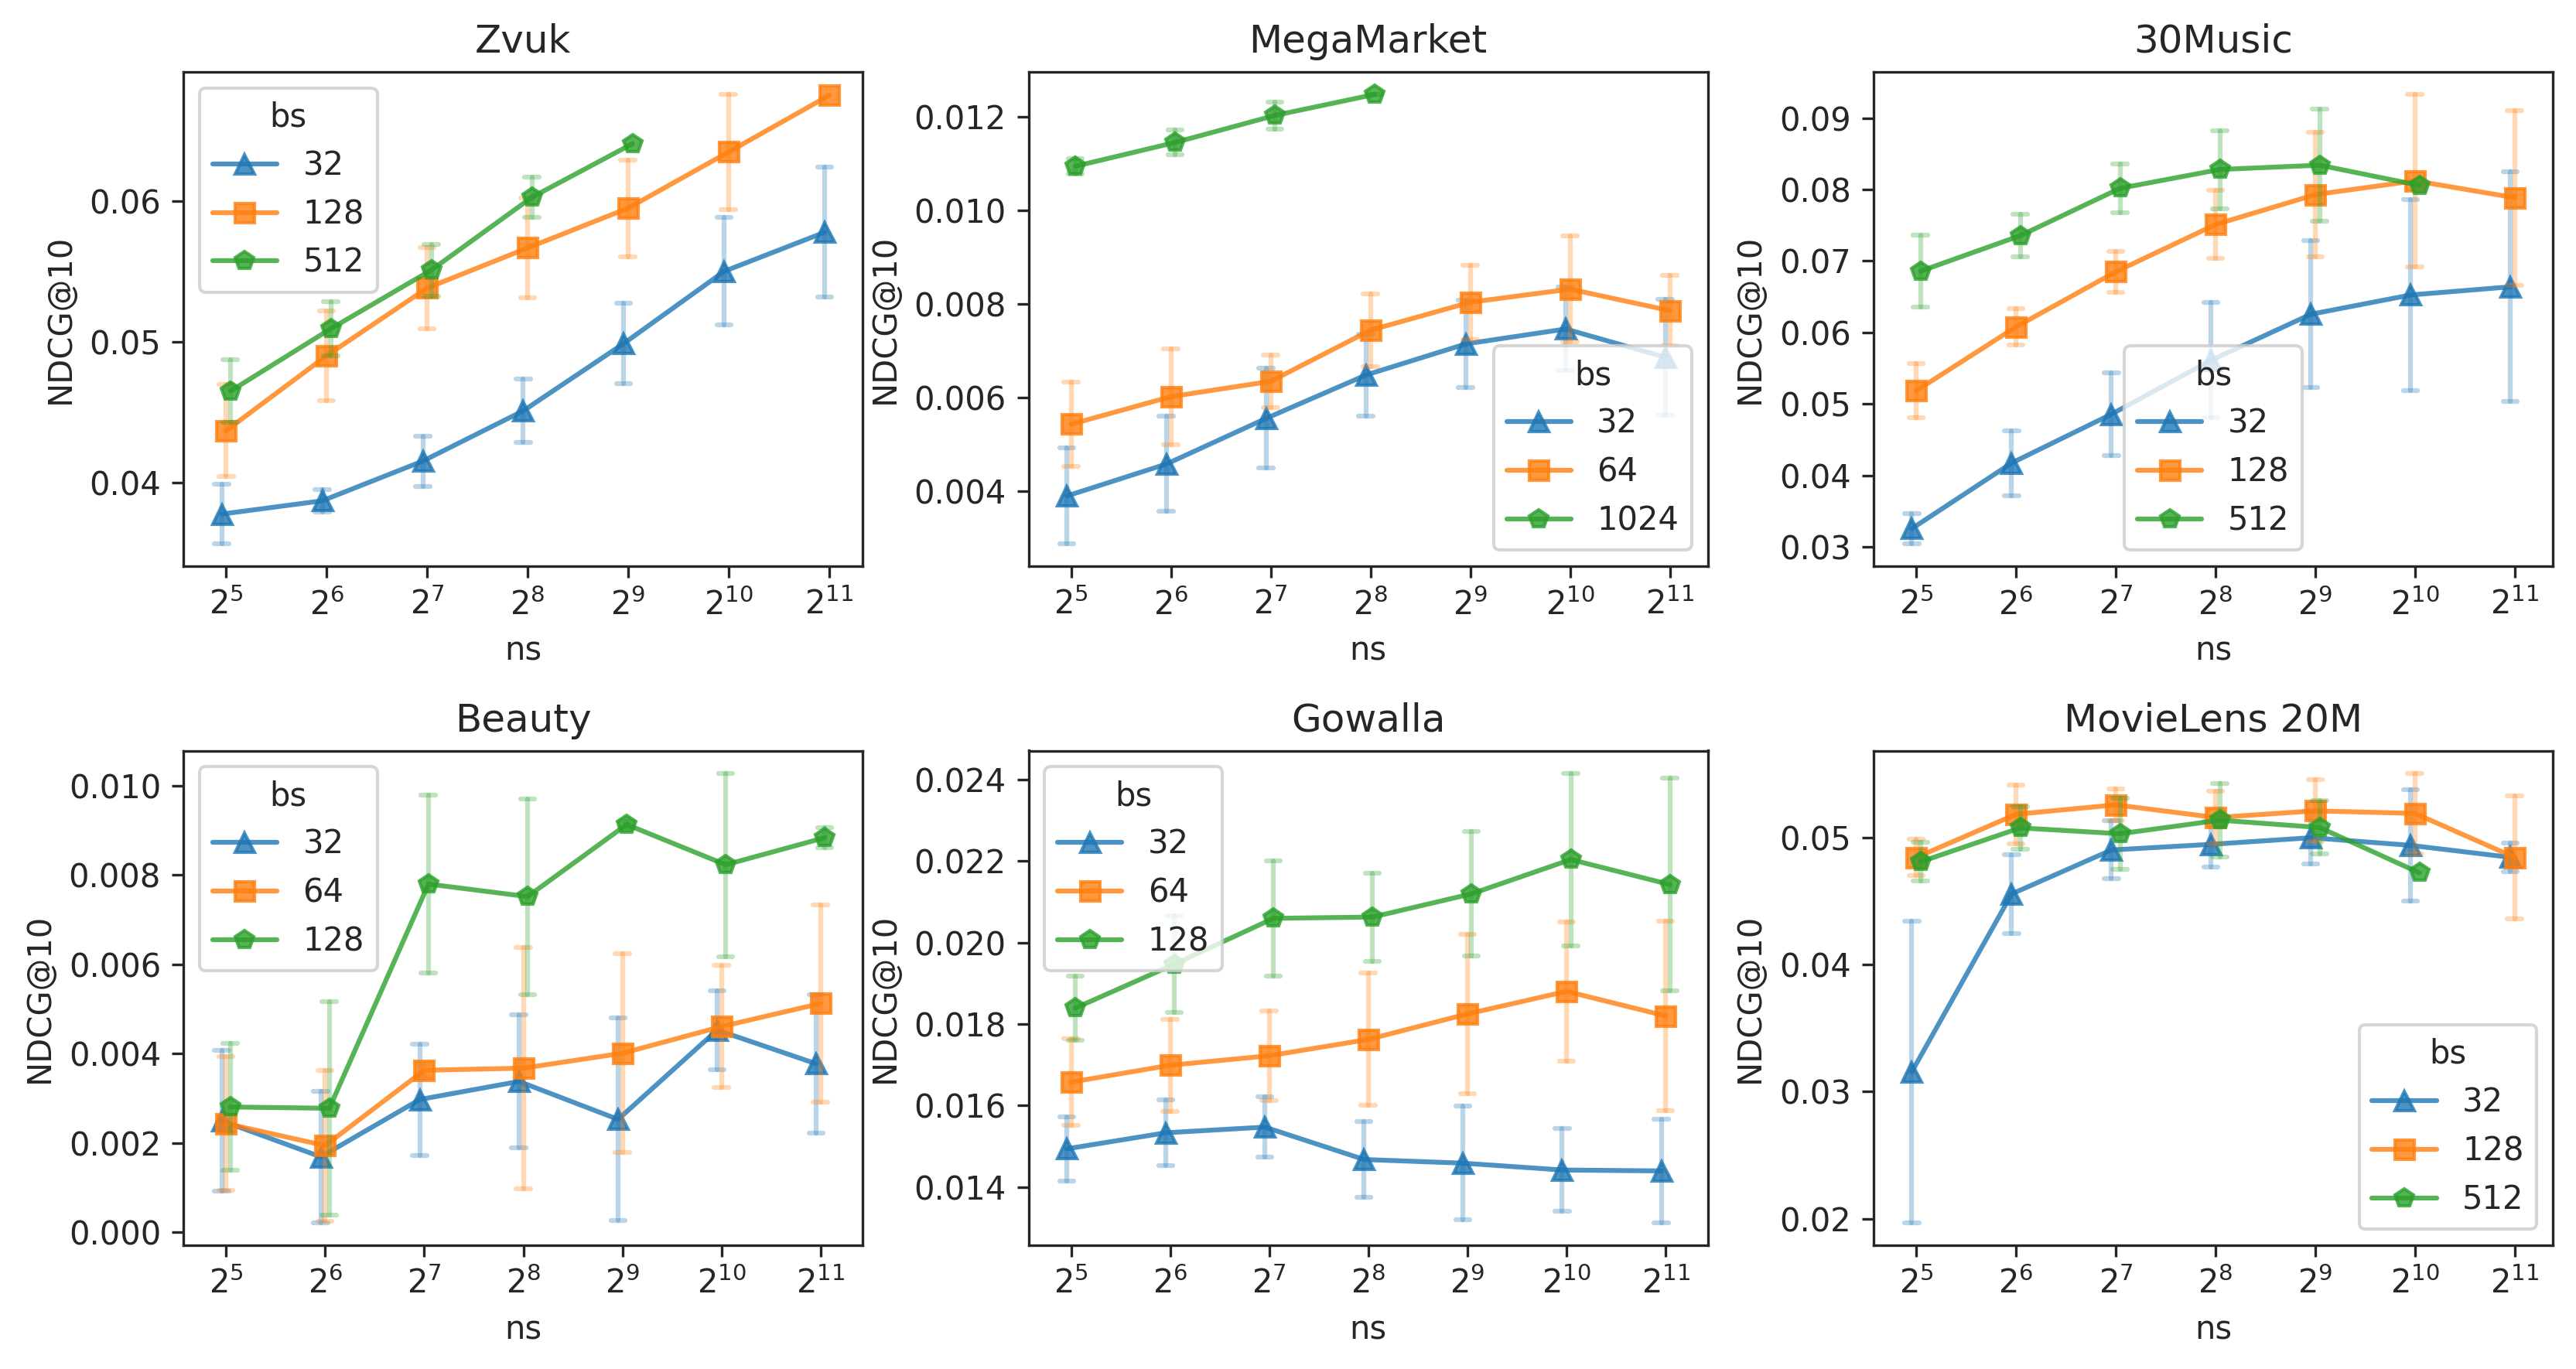

In [83]:
datasets = ['Zvuk', 'MegaMarket', '30Music', 'Beauty', 'Gowalla', 'MovieLens 20M']
ds_short_names = ['zvuk', 'megamarket', '30music', 'beauty', 'gowalla', 'movielens20m']

ds_to_full_name = dict(zip(ds_short_names, datasets))

fig, axes = plt.subplots(2, 3, figsize=(13, 6), dpi=300)

for i, ds_name in enumerate(ds_short_names):
    ax = axes[i // 3, i % 3]

    mask = (df_all_exp['exp_name'].str.contains(ds_name)) & \
            (~df_all_exp['exp_name'].str.contains('cce')) & \
            (~df_all_exp['exp_name'].str.contains('lr'))  & \
            (df_all_exp['batch_size'] > 30)  & \
            (df_all_exp['loss_sample_count'].astype(str).str.slice(0, 2) != '15')

    df = df_all_exp[mask].reset_index(drop=True)
    df['loss_sample_count'] = df['loss_sample_count'].round().fillna(np.inf)
    reject_params = df['max_seq_len'].nunique() > 3
    
    if len(df) == 0:
        print(ds_name)
        continue
    plot_connection(df=df, title_name=datasets[i], metric='NDCG@10', color_feature='bs', param_feature='ns', rename_features=rename_dict, ax=ax, filter=reject_params)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig('../pictures/connections_bs.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.savefig('../pictures/connections_bs.png', dpi=1000, format='png', bbox_inches='tight')
plt.show()

## Corr plot

In [84]:
ds_name = 'zvuk'

mask = (df_all_exp['exp_name'].str.contains(ds_name)) & \
    (~df_all_exp['exp_name'].str.contains('cce')) & \
    (~df_all_exp['exp_name'].str.contains('lr')) & \
    (df_all_exp['loss_sample_count'] % 2 == 0) 

df = df_all_exp[mask].reset_index(drop=True)
df['loss_sample_count'] = df['loss_sample_count'].round().fillna(np.inf)

In [85]:
from itertools import combinations

def plot_corr(
    df,
    title_name,
    rename_features=None,
    p_crit=0.05,
    ax=None,
    include_combinations=True,
    drop_hp = True,
    cbar = True
):

    df_corr = df[['NDCG_10_test', 'Coverage_10_test', 'Surprisal_10_test', 'loss_sample_count', 'batch_size', 'max_seq_len']]

    if include_combinations:
        df_corr['loss_sample_count^batch_size'] = df_corr['loss_sample_count'] * df_corr['batch_size']
        df_corr['loss_sample_count^max_seq_len'] = df_corr['loss_sample_count'] * df_corr['max_seq_len']
        df_corr['max_seq_len^batch_size'] = df_corr['max_seq_len'] * df_corr['batch_size']
        if rename_features:
            nn_new_name = rename_features['loss_sample_count']
            bs_new_name = rename_features['batch_size']
            sl_new_name = rename_features['max_seq_len']
            rename_features.update({
                'loss_sample_count^batch_size': f'{nn_new_name}-{bs_new_name}',
                'loss_sample_count^max_seq_len': f'{nn_new_name}-{sl_new_name}',
                'max_seq_len^batch_size': f'{sl_new_name}-{bs_new_name}',
            })

    if rename_features:
        df_corr = df_corr.rename(columns=rename_features)

    n_features = df_corr.shape[1]
    p_mtx = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(i + 1, n_features):
            x, y = df_corr.iloc[:, i], df_corr.iloc[:, j]
            r, p = spearmanr(x, y)
            p_mtx[i, j] = p < p_crit

    mask = np.tril(np.ones((n_features, n_features)), 0)
    corr_mtx = df_corr.corr(method='spearman')
    corr_mtx_annot = corr_mtx.round(2).astype(str)


    corr_mtx_annot = corr_mtx.round(2).astype(str) + np.where(p_mtx==1,'*', '')
    corr_mtx_annot = np.where(1 - mask, corr_mtx_annot, '')

    if drop_hp:
        corr_mtx, corr_mtx_annot, mask = corr_mtx.iloc[:3, 3:], corr_mtx_annot[:3, 3:], mask[:3, 3:]

    if not ax:
        if drop_hp:
            plt.figure(figsize=(7, 3))
        plt.title(title_name)
        sns.heatmap(corr_mtx, vmin=-1, vmax=1, center=0, annot=corr_mtx_annot, fmt='', cmap='coolwarm', mask=mask)
        plt.xticks(rotation=45,  ha='right')
        plt.show()
    else:
        ax.set_title(title_name)
        sns.heatmap(corr_mtx, vmin=-1, vmax=1, center=0, annot=corr_mtx_annot, fmt='', cmap='coolwarm', mask=mask, ax=ax, cbar=cbar)
        ax.tick_params(axis='x', labelrotation=45)


def plot_corr(
    df,
    title_name,
    rename_features=None,
    p_crit=0.05,
    ax=None,
    include_combinations=True,
    drop_hp = True,
    cbar = True
):

    df_corr = df[['NDCG_10_test', 'Coverage_10_test', 'Surprisal_10_test', 'loss_sample_count', 'batch_size', 'max_seq_len']]

    if include_combinations:
        df_corr['loss_sample_count^batch_size'] = df_corr['loss_sample_count'] * df_corr['batch_size']
        df_corr['loss_sample_count^max_seq_len'] = df_corr['loss_sample_count'] * df_corr['max_seq_len']
        df_corr['max_seq_len^batch_size'] = df_corr['max_seq_len'] * df_corr['batch_size']
        if rename_features:
            nn_new_name = rename_features['loss_sample_count']
            bs_new_name = rename_features['batch_size']
            sl_new_name = rename_features['max_seq_len']
            rename_features.update({
                'loss_sample_count^batch_size': f'{nn_new_name}-{bs_new_name}',
                'loss_sample_count^max_seq_len': f'{nn_new_name}-{sl_new_name}',
                'max_seq_len^batch_size': f'{sl_new_name}-{bs_new_name}',
            })

    if rename_features:
        df_corr = df_corr.rename(columns=rename_features)

    n_features = df_corr.shape[1]
    p_mtx = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(i + 1, n_features):
            x, y = df_corr.iloc[:, i], df_corr.iloc[:, j]
            r, p = spearmanr(x, y)
            p_mtx[i, j] = p < p_crit

    mask = np.tril(np.ones((n_features, n_features)), 0)
    corr_mtx = df_corr.corr(method='spearman')
    corr_mtx_annot = corr_mtx.round(2).astype(str)


    corr_mtx_annot = corr_mtx.round(2).astype(str) + np.where(p_mtx==1,'*', '')
    corr_mtx_annot = np.where(1 - mask, corr_mtx_annot, '')

    if drop_hp:
        corr_mtx, corr_mtx_annot, mask = corr_mtx.iloc[:3, 3:], corr_mtx_annot[:3, 3:], mask[:3, 3:]

    if not ax:
        if drop_hp:
            plt.figure(figsize=(7, 3))
        plt.title(title_name)
        sns.heatmap(corr_mtx, vmin=-1, vmax=1, center=0, annot=corr_mtx_annot, fmt='', cmap='coolwarm', mask=mask)
        plt.xticks(rotation=45,  ha='right')
        plt.show()
    else:
        ax.set_title(title_name)
        sns.heatmap(corr_mtx, vmin=-1, vmax=1, center=0, annot=corr_mtx_annot, fmt='', cmap='coolwarm', mask=mask, ax=ax, cbar=cbar)
        ax.tick_params(axis='x', labelrotation=45)

/tmp/ipykernel_1186268/1089677874.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['loss_sample_count^batch_size'] = df_corr['loss_sample_count'] * df_corr['batch_size']
/tmp/ipykernel_1186268/1089677874.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['loss_sample_count^max_seq_len'] = df_corr['loss_sample_count'] * df_corr['max_seq_len']
/tmp/ipykernel_1186268/1089677874.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

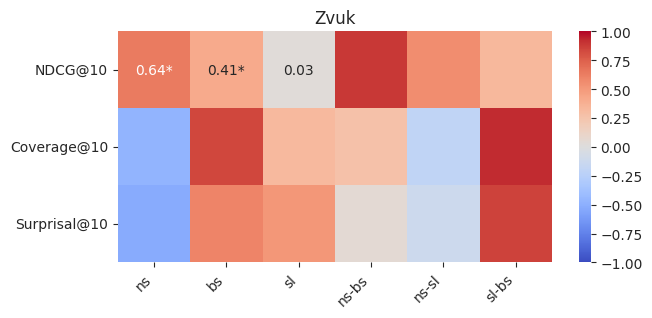

In [86]:
plot_corr(df, 'Zvuk', rename_features=rename_dict)

/tmp/ipykernel_1186268/1089677874.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['loss_sample_count^batch_size'] = df_corr['loss_sample_count'] * df_corr['batch_size']
/tmp/ipykernel_1186268/1089677874.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['loss_sample_count^max_seq_len'] = df_corr['loss_sample_count'] * df_corr['max_seq_len']
/tmp/ipykernel_1186268/1089677874.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

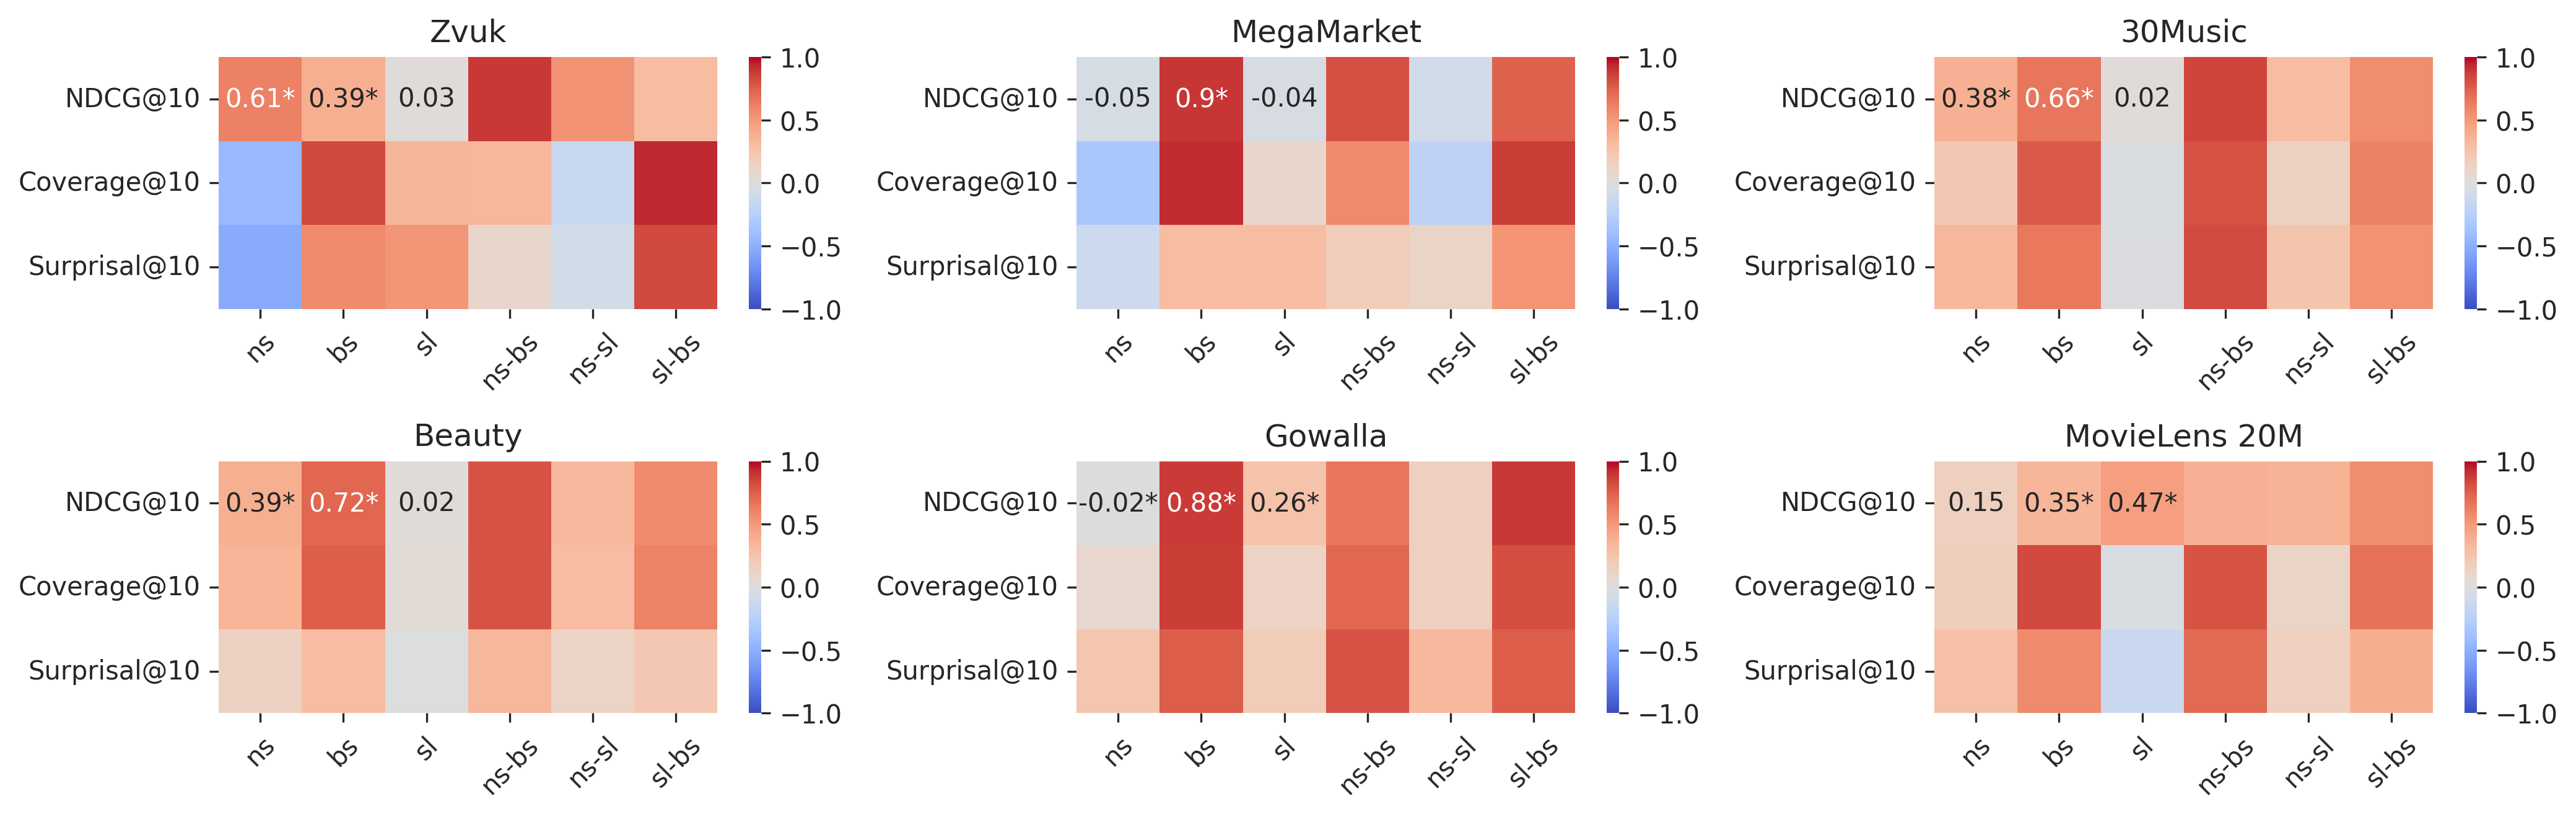

In [87]:
datasets = ['Zvuk', 'MegaMarket', '30Music', 'Beauty', 'Gowalla', 'MovieLens 20M']
ds_short_names = ['zvuk', 'megamarket', '30music', 'beauty', 'gowalla', 'movielens20m']

ds_to_full_name = dict(zip(ds_short_names, datasets))

fig, axes = plt.subplots(2, 3, figsize=(14, 4.5), dpi=300)

for i, ds_name in enumerate(ds_short_names):
    ax = axes[i // 3, i % 3]

    mask = (df_all_exp['exp_name'].str.contains(ds_name)) & \
            (~df_all_exp['exp_name'].str.contains('cce')) & \
            (~df_all_exp['exp_name'].str.contains('lr'))  & \
            (df_all_exp['loss_sample_count'].astype(str).str.slice(0, 2) != '15')

    df = df_all_exp[mask].reset_index(drop=True)
    df['loss_sample_count'] = df['loss_sample_count'].round().fillna(np.inf)
    reject_params = df['max_seq_len'].nunique() > 4
    
    if len(df) == 0:
        print(ds_name)
        continue
    plot_corr(df=df, title_name=datasets[i], rename_features=rename_dict, ax=ax, cbar=True)  

plt.tight_layout()
plt.savefig('../pictures/correlations.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.savefig('../pictures/correlations.png', dpi=1000, format='png', bbox_inches='tight')
plt.show()

# model estimation

In [88]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [89]:
ds_name = 'zvuk'

mask = (df_all_exp['exp_name'].str.contains(ds_name)) & \
    (~df_all_exp['exp_name'].str.contains('cce')) & \
    (~df_all_exp['exp_name'].str.contains('lr')) & \
    (df_all_exp['loss_sample_count'] % 2 == 0) 

df = df_all_exp[mask].reset_index(drop=True)
df['loss_sample_count'] = df['loss_sample_count'].round().fillna(np.inf)

In [90]:
def regression_plot(
    df,
    title_name,
    add_plot=True,
    add_table=False,
    ax=None
):
    df = df.copy()
    df['loss_sample_count^batch_size'] = df['loss_sample_count'] * df['batch_size']
    df['loss_sample_count^max_seq_len'] = df['loss_sample_count'] * df['max_seq_len']
    df['max_seq_len^batch_size'] = df['max_seq_len'] * df['batch_size']

    X = df[['loss_sample_count', 'batch_size', 'max_seq_len', 'loss_sample_count^batch_size', 'loss_sample_count^max_seq_len', 'max_seq_len^batch_size']]
    y = df['NDCG_10_test'] 

    X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

    X = sm.add_constant(X)
    result = sm.OLS(y, X).fit()

    r2 = round(result.rsquared, 3)

    if add_table:
        print(result.summary())

    if add_plot and not ax:
        plt.figure(figsize=(6, 3))
        plt.title(title_name)
        col_name = [col_name if p > 0.05 else col_name + '*' for col_name, p in zip(X.columns[1:], result.pvalues.values[1:]) ]
        colors = ['grey' if p > 0.05 else 'blue' for p in result.pvalues.values[1:]]
        plt.bar(col_name, result.params.values[1:], color=colors)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel(f'Regression coefficient, R2 = {r2}')
        plt.grid()
        plt.show()
    elif add_plot:
        ax.set_title(title_name)
        col_name = [col_name if p > 0.05 else col_name + '*' for col_name, p in zip(X.columns[1:], result.pvalues.values[1:]) ]
        colors = ['grey' if p > 0.05 else 'blue' for p in result.pvalues.values[1:]]
        ax.bar(col_name, result.params.values[1:], color=colors)
        ax.tick_params(axis='x', labelrotation=45)
        ax.set_xlabel('Features')
        ax.set_ylabel(f'Regression coefficient, R2 = {r2}')
        ax.grid()



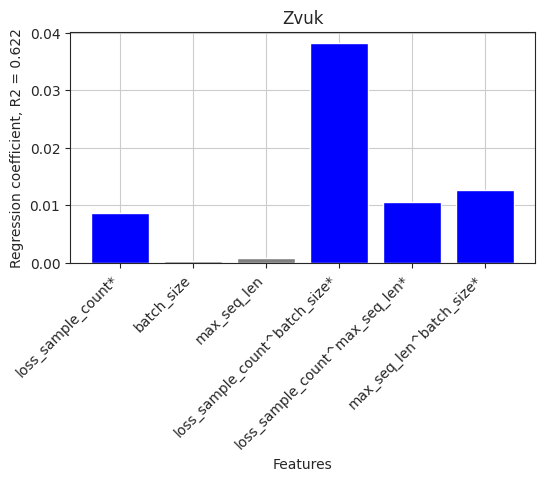

In [91]:
regression_plot(df, title_name='Zvuk')

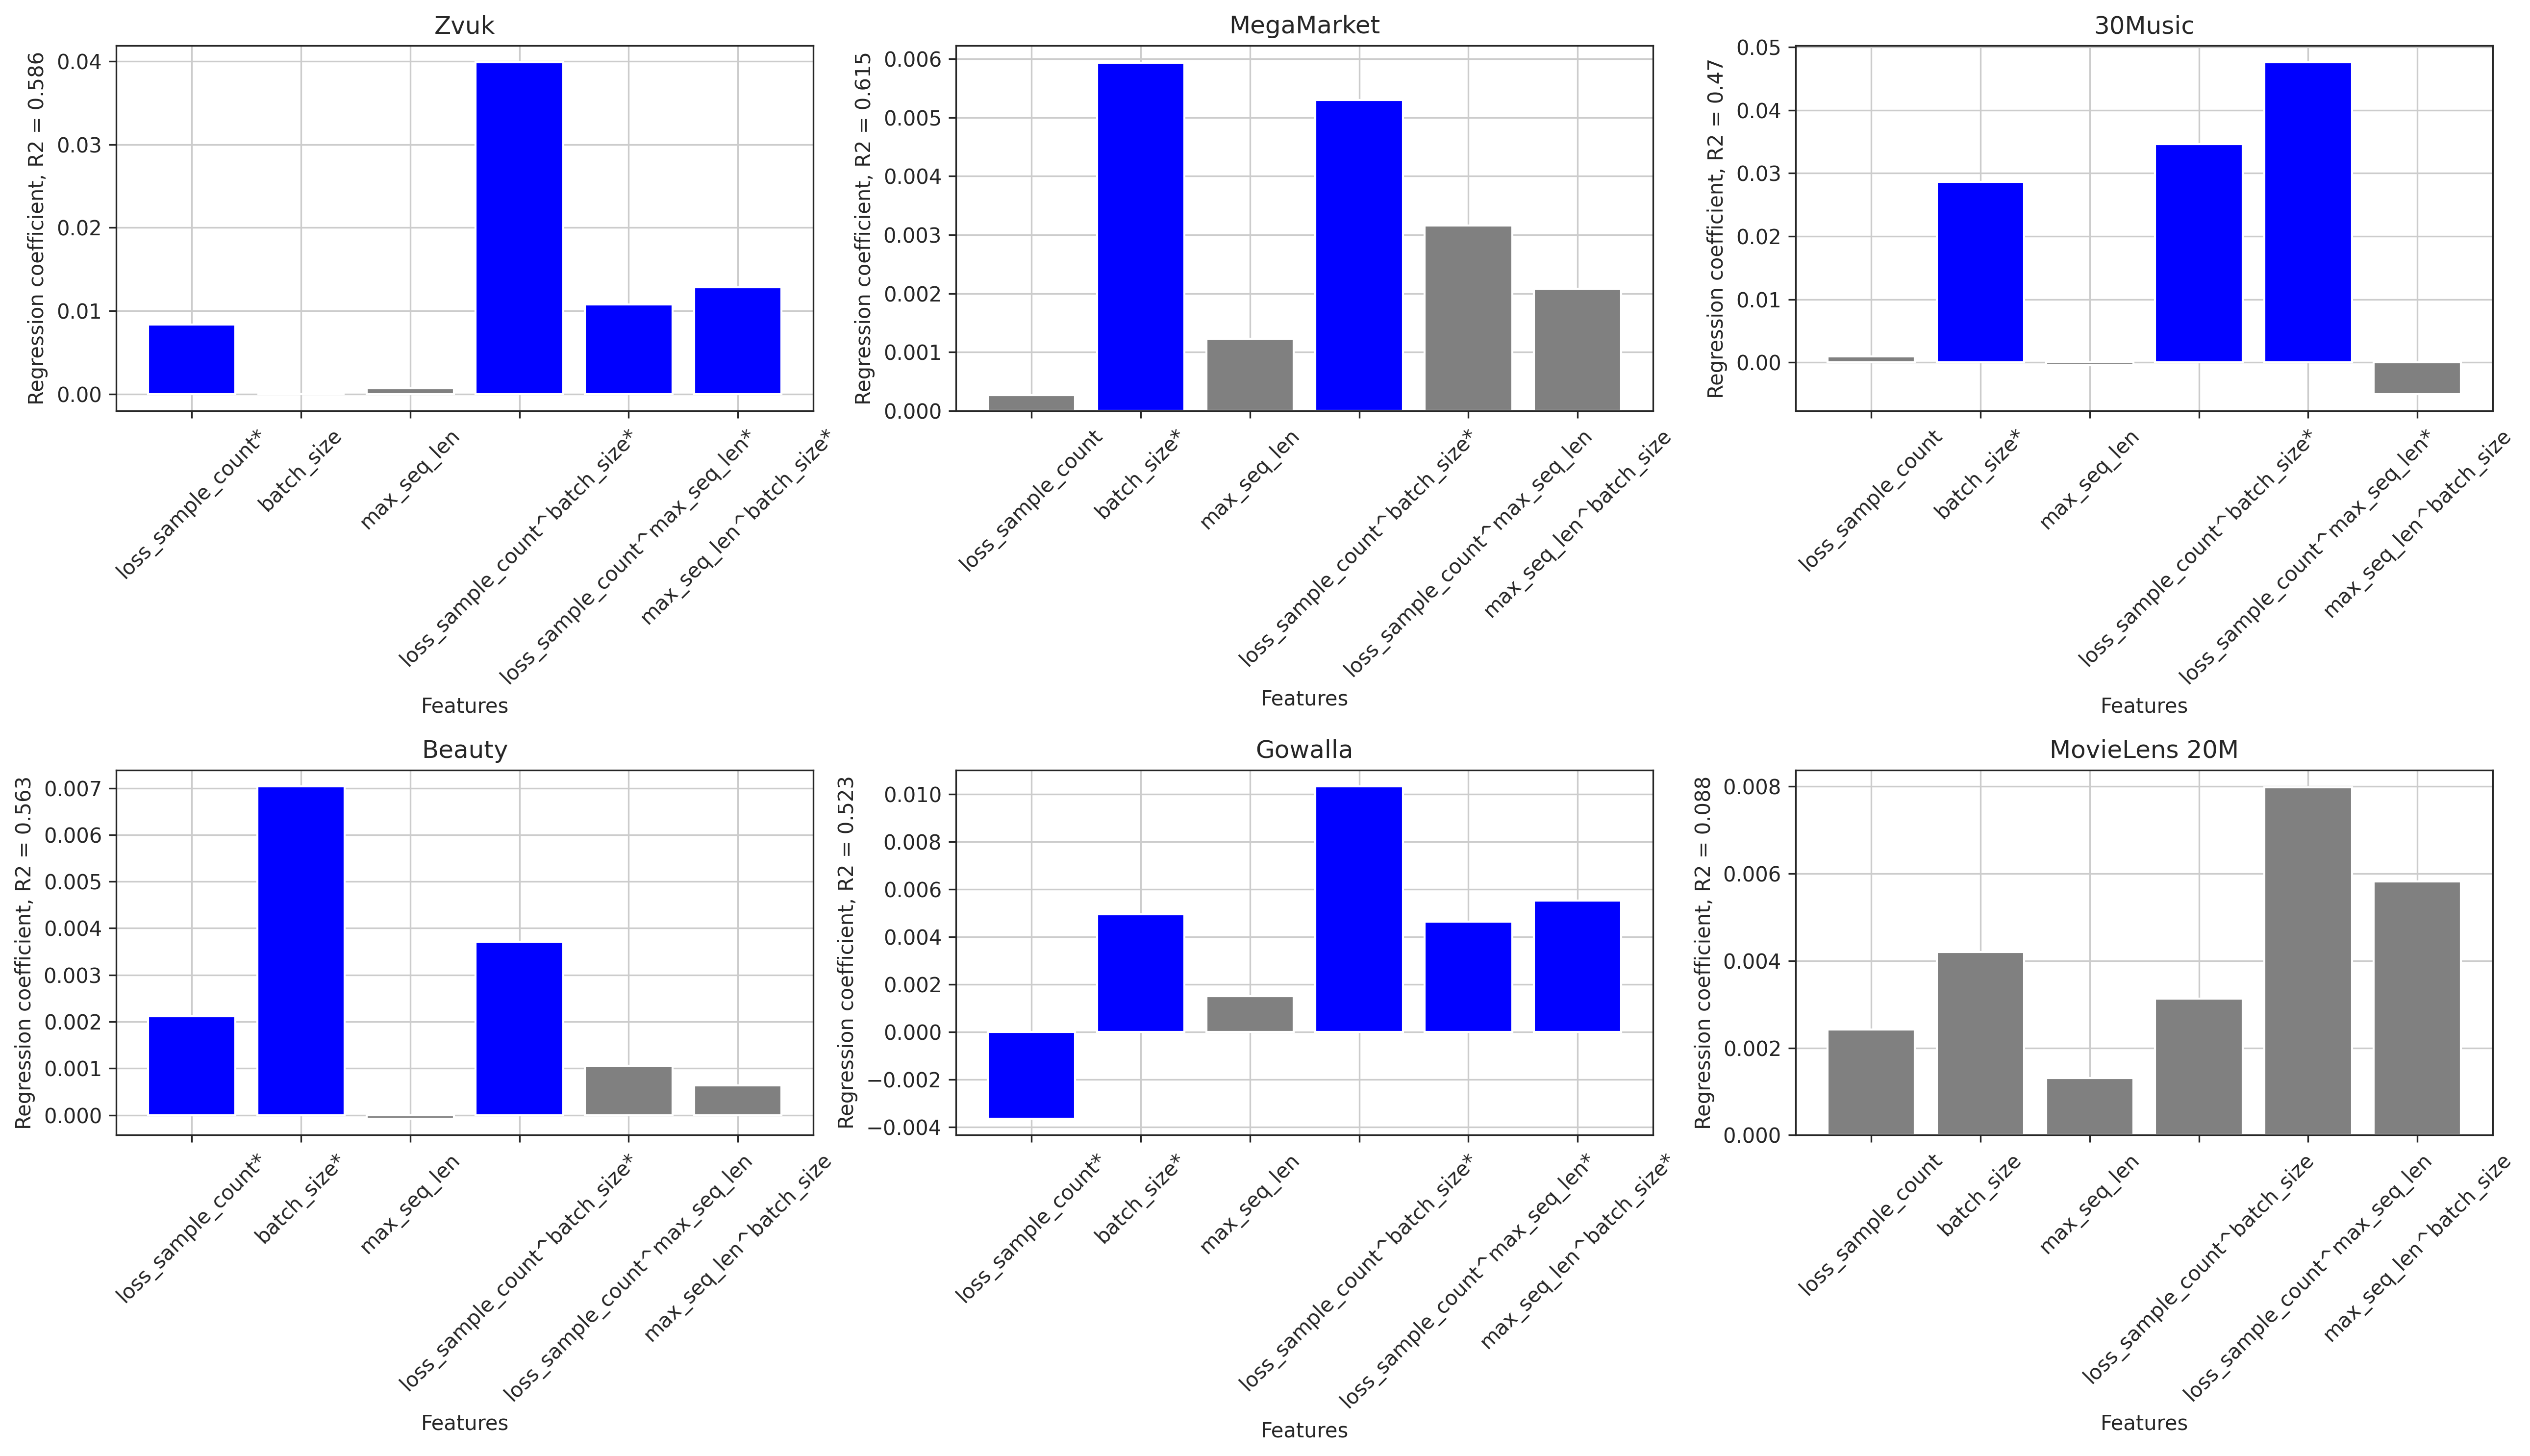

In [92]:
datasets = ['Zvuk', 'MegaMarket', '30Music', 'Beauty', 'Gowalla', 'MovieLens 20M']
ds_short_names = ['zvuk', 'megamarket', '30music', 'beauty', 'gowalla', 'movielens20m']

ds_to_full_name = dict(zip(ds_short_names, datasets))

fig, axes = plt.subplots(2, 3, figsize=(20, 10), dpi=300)

for i, ds_name in enumerate(ds_short_names):
    ax = axes[i // 3, i % 3]

    mask = (df_all_exp['exp_name'].str.contains(ds_name)) & \
            (~df_all_exp['exp_name'].str.contains('cce')) & \
            (~df_all_exp['exp_name'].str.contains('lr'))  & \
            (~df_all_exp['loss_sample_count'].isna())  & \
            (df_all_exp['loss_sample_count'].astype(str).str.slice(0, 2) != '15')

    df = df_all_exp[mask].reset_index(drop=True)
    df['loss_sample_count'] = df['loss_sample_count'].round().fillna(np.inf)
    reject_params = df['max_seq_len'].nunique() > 4
    
    if len(df) == 0:
        print(ds_name)
        continue
    regression_plot(df=df, title_name=datasets[i], ax=ax) 

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

def rf_fe_plot(
    df,
    title_name,
    y_name = 'NDCG_10_test',
    add_plot=True,
    ax=None
):
    df = df.copy()
    df['loss_sample_count^batch_size'] = df['loss_sample_count'] * df['batch_size']
    df['loss_sample_count^max_seq_len'] = df['loss_sample_count'] * df['max_seq_len']
    df['max_seq_len^batch_size'] = df['max_seq_len'] * df['batch_size']

    X = df[['loss_sample_count', 'batch_size', 'max_seq_len', 'loss_sample_count^batch_size', 'loss_sample_count^max_seq_len', 'max_seq_len^batch_size']]
    y = df[y_name] 

    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    preds = model.predict(X)
    feature_importance = model.feature_importances_

    r2 = round(r2_score(y, preds), 3)

    if add_plot and not ax:
        plt.figure(figsize=(6, 3))
        plt.title(title_name)
        plt.bar(X.columns, feature_importance)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel(f'Feature importance, R2 {r2}')
        plt.grid()
        plt.show()
    elif add_plot:
        ax.set_title(title_name)
        ax.bar(X.columns, feature_importance)
        ax.tick_params(axis='x', labelrotation=45)
        ax.set_xlabel('Features')
        ax.set_ylabel(f'Feature importance, R2 {r2}')
        ax.grid()

    return X.columns, feature_importance

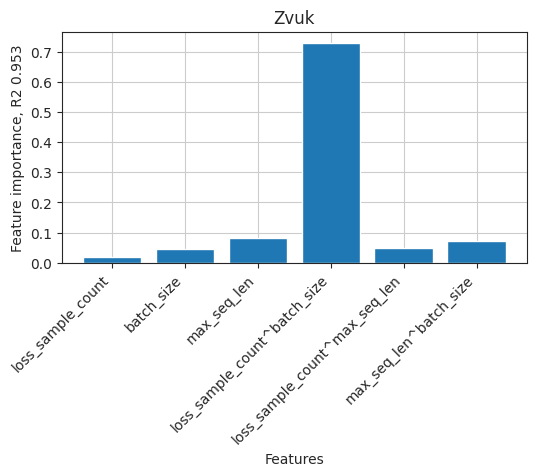

(Index(['loss_sample_count', 'batch_size', 'max_seq_len',
        'loss_sample_count^batch_size', 'loss_sample_count^max_seq_len',
        'max_seq_len^batch_size'],
       dtype='object'),
 array([0.01915043, 0.04461153, 0.08331353, 0.72985942, 0.04972931,
        0.07333579]))

In [94]:
rf_fe_plot(df, title_name='Zvuk')

In [95]:
datasets = ['Zvuk', 'MegaMarket', '30Music', 'Beauty', 'Gowalla', 'MovieLens 20M']
ds_short_names = ['zvuk', 'megamarket', '30music', 'beauty', 'gowalla', 'movielens20m']

ds_to_full_name = dict(zip(ds_short_names, datasets))

fe_dict = {}

for metric_y in ['NDCG_10_test', 'Coverage_10_test', 'Surprisal_10_test']:
    fe_dict[metric_y] = []
    for i, ds_name in enumerate(ds_short_names):
        ax = axes[i // 3, i % 3]

        mask = (df_all_exp['exp_name'].str.contains(ds_name)) & \
                (~df_all_exp['exp_name'].str.contains('cce')) & \
                (~df_all_exp['exp_name'].str.contains('lr'))  & \
                (~df_all_exp['loss_sample_count'].isna())  & \
                (df_all_exp['loss_sample_count'].astype(str).str.slice(0, 2) != '15')

        df = df_all_exp[mask].reset_index(drop=True)
        df['loss_sample_count'] = df['loss_sample_count'].round().fillna(np.inf)
        reject_params = df['max_seq_len'].nunique() > 4
        
        if len(df) == 0:
            print(ds_name)
            continue
        feature_names, fe = rf_fe_plot(df=df, title_name=datasets[i], y_name=metric_y, ax=ax, add_plot=False) 
        fe_dict[metric_y].append(fe)

In [96]:
rename_feature = rename_dict.copy()

nn_new_name = rename_feature['loss_sample_count']
bs_new_name = rename_feature['batch_size']
sl_new_name = rename_feature['max_seq_len']
rename_feature.update({
    'loss_sample_count^batch_size': f'{nn_new_name}-{bs_new_name}',
    'loss_sample_count^max_seq_len': f'{nn_new_name}-{sl_new_name}',
    'max_seq_len^batch_size': f'{sl_new_name}-{bs_new_name}',
})

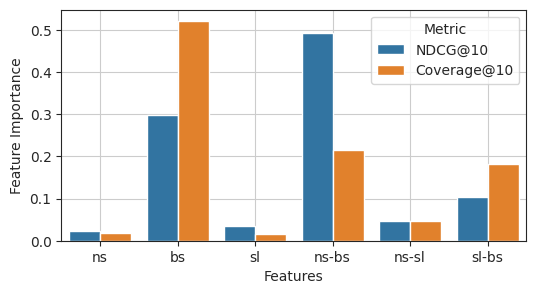

In [97]:
df_bar_plot = pd.DataFrame()
new_feature_names = [rename_feature[name] for name in feature_names]

for i, (ax, (metric, fe_vals)) in enumerate(zip(axes, fe_dict.items())):
    features = np.mean(fe_vals, axis=0)
    data = pd.DataFrame(features, columns=['Feature Importance'])
    data['Features'], data['Metric'] = new_feature_names, rename_feature[metric]
    df_bar_plot = pd.concat([df_bar_plot, data])

plt.figure(figsize=(6, 3))
sns.barplot(data=df_bar_plot, x='Features', y='Feature Importance', hue='Metric')
plt.grid()

plt.savefig('../pictures/fe_forest_2.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.savefig('../pictures/fe_forest_2.png', dpi=1000, format='png', bbox_inches='tight')
plt.show()

# Mutal Information

In [98]:
from sklearn.feature_selection import mutual_info_regression

def mu_data(
    df,
    y_name = 'NDCG_10_test',
):
    df = df.copy()
    df['loss_sample_count^batch_size'] = df['loss_sample_count'] * df['batch_size']
    df['loss_sample_count^max_seq_len'] = df['loss_sample_count'] * df['max_seq_len']
    df['max_seq_len^batch_size'] = df['max_seq_len'] * df['batch_size']

    X = df[['loss_sample_count', 'batch_size', 'max_seq_len', 'loss_sample_count^batch_size', 'loss_sample_count^max_seq_len', 'max_seq_len^batch_size']]
    y = df[y_name] 
    feature_importance = mutual_info_regression(X, y)

    
    return X.columns, feature_importance

def corr_data(
    df,
    y_name = 'NDCG_10_test',
):
    df = df.copy()
    df['loss_sample_count^batch_size'] = df['loss_sample_count'] * df['batch_size']
    df['loss_sample_count^max_seq_len'] = df['loss_sample_count'] * df['max_seq_len']
    df['max_seq_len^batch_size'] = df['max_seq_len'] * df['batch_size']

    features = ['loss_sample_count', 'batch_size', 'max_seq_len', 'loss_sample_count^batch_size', 'loss_sample_count^max_seq_len', 'max_seq_len^batch_size']

    df_corr = df[[y_name] + features].corr(method='spearman').loc[y_name, features]
    return df_corr.index, df_corr.values

In [99]:
datasets = ['Zvuk', 'MegaMarket', '30Music', 'Beauty', 'Gowalla', 'MovieLens 20M']
ds_short_names = ['zvuk', 'megamarket', '30music', 'beauty', 'gowalla', 'movielens20m']

ds_to_full_name = dict(zip(ds_short_names, datasets))


fe_dict = {}

for metric_y in ['NDCG_10_test', 'Coverage_10_test', 'Surprisal_10_test']:
    fe_dict[metric_y] = []
    for i, ds_name in enumerate(ds_short_names):
        ax = axes[i // 3, i % 3]

        mask = (df_all_exp['exp_name'].str.contains(ds_name)) & \
                (~df_all_exp['exp_name'].str.contains('cce')) & \
                (~df_all_exp['exp_name'].str.contains('lr'))  & \
                (~df_all_exp['loss_sample_count'].isna())  & \
                (df_all_exp['loss_sample_count'].astype(str).str.slice(0, 2) != '15')

        df = df_all_exp[mask].reset_index(drop=True)
        df['loss_sample_count'] = df['loss_sample_count'].round().fillna(np.inf)
        reject_params = df['max_seq_len'].nunique() > 4
        
        if len(df) == 0:
            print(ds_name)
            continue
        feature_names, fe = corr_data(df=df, y_name=metric_y)
        fe_dict[metric_y].append(fe)

In [100]:
rename_feature = rename_dict.copy()

nn_new_name = rename_feature['loss_sample_count']
bs_new_name = rename_feature['batch_size']
sl_new_name = rename_feature['max_seq_len']
rename_feature.update({
    'loss_sample_count^batch_size': f'{nn_new_name}-{bs_new_name}',
    'loss_sample_count^max_seq_len': f'{nn_new_name}-{sl_new_name}',
    'max_seq_len^batch_size': f'{sl_new_name}-{bs_new_name}',
})

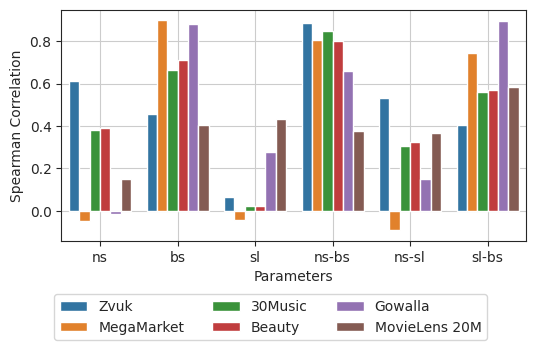

In [101]:

df_bar_plot = pd.DataFrame()
new_feature_names = [rename_feature[name] for name in feature_names]


for i, (ax, (metric, vals)) in enumerate(zip(axes, fe_dict.items())):
    data = pd.DataFrame(vals, columns=new_feature_names, index = datasets).reset_index(names=['Dataset'])
    data['Metric'] = rename_feature[metric]
    df_bar_plot = pd.concat([df_bar_plot, data])


df_bar_plot = pd.melt(df_bar_plot, id_vars=['Dataset', 'Metric'], value_vars=new_feature_names, var_name='Parameters', value_name='Mutal Information')
df_bar_plot = df_bar_plot[df_bar_plot['Metric'] == 'NDCG@10']


plt.figure(figsize=(6, 3))
sns.barplot(data=df_bar_plot, x='Parameters', y='Mutal Information', hue='Dataset')
plt.legend(bbox_to_anchor=(0.45, -0.2), ncol=3, loc='upper center')
plt.grid()

plt.ylabel('Spearman Correlation')

plt.savefig('../pictures/correlation_ndcg.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.savefig('../pictures/correlation_ndcg.png', dpi=1000, format='png', bbox_inches='tight')
plt.show()